
### Author - Anjali Aggarwal

#             "Breast cancer diagnosis using cell nucleus characterstics"

# Abstract

In the present study, a linear model is generated to predict the type of the breast cancer - benign or malignant by using wisconsin diagnostic breast cancer data-set available at the UCI machine learning repository. This is a classification problem.This data has been obtained from the digital images of the cancer cell nucleus. The original data-set contain one target-label("Diagnosis") and 30 other cell nucleus features. Out of the 30 features, one feature was "id" of the image which was removed from the dataframe. There is not any missing value in the data and all the features values are numeric except "Diagnosis" feature which was convert to numeric ( 1 is for benign and 2 is for malignant). Data was loaded into the python panda dataframe and python pakages were imported. First, distribution of all the features were checked by the histogram and also distribution of data with repect to diagnosis was visualized by violin plots and box plots with the scaled features. In order to remove the collineality among the features, correlation cofficents were calculated and heat maps were also plotted. Some highly correlated features (10 features out of 30 features) were removed from the data frame and a linear regression was performed with the remaining 20 featuers. To further model improvment and for dimension reduction, principal component analysis (PCA) was performed. Three pricipal components were selected with higher variance. Further, a principal component regression was obtained with these three principal components. However, PCA did not improve the accuracy of the model.

# Introduction and problem

Breast cancer is very common cancer among the women and there are fairly good chances to completely cure the cancer if it can be detected early. There are two type of cancer - benign and malignant. Benign does not invade nearby tissues or spread to other part of the body, however, melignant can spread to other part or organ of the body. Outlook of the melignant cancer is very low, therfore it is nessassary to detect type of the cancer on the early stage (source: wikipedia).

A good machine-learning model can accureately predict the type of breast cancer.I have tried to make a linear regression model by using cancer cell nucleus features. Data for the present study was obtained from the UCI machine learning repository. Data-set contain 31 features including diagnosis features which is only categorical feature in which "B" is represent for benign and "M" is represent for malignant. Other nucleus features were calculated from a digitized image of a fine needle aspirate of a breast mass. There are ten nuclear features and for each feature, higher values are typically associated with the malignancy. Nuclear size is expressed by the radius and area features. Nuclear shape is expressed by smoothness, concavity, compactness, concave points, symmetry and fractal dimension features. Both size and shape are expressed by the perimeter feature. Nuclear texture is measured by finding the variance of the grey scale intensities in the component pixels. The mean value, Worst (mean of the three largest value) and the standard error of the each feature were computed for each image, resulting in a total of thirty features. 

In [1]:
#import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [2]:
# loading the data in panda dataframe
filename = "http://mlr.cs.umass.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
cancer_df = pd.read_csv(filename)

In [3]:
#checking first 5 rows of the data
cancer_df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
# changing the features name according to information provided by the dataset at UCI repositiory
cancer_df.columns = ['ID', 'Diagnosis','RadiusM', 'TextM', 'PeriM', 'AreaM', 'SmoothM', 'CompactM', 'ConcaveM', 'CPpointM', 'SymM', 'FracDimM','RadiusSE', 'TextSE', 'PeriSE', 'AreaSE', 'SmoothSE', 'CompactSE', 'ConcaveSE', 'CPpointSE', 'SymSE', 'FracDimSE', 'RadiusW', 'TextW', 'PeriW', 'AreaW', 'SmoothW', 'CompactW', 'ConcaveW', 'CPpointW', 'SymW', 'FracDimW']

In [5]:
#checking again if columns name has been changed
cancer_df.head()

,ID,Diagnosis,RadiusM,TextM,PeriM,AreaM,SmoothM,CompactM,ConcaveM,CPpointM,...,RadiusW,TextW,PeriW,AreaW,SmoothW,CompactW,ConcaveW,CPpointW,SymW,FracDimW
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [6]:
cancer_df.isnull().values.any()#checking if there is any missing value in the data set

False

In [7]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
ID           568 non-null int64
Diagnosis    568 non-null object
RadiusM      568 non-null float64
TextM        568 non-null float64
PeriM        568 non-null float64
AreaM        568 non-null float64
SmoothM      568 non-null float64
CompactM     568 non-null float64
ConcaveM     568 non-null float64
CPpointM     568 non-null float64
SymM         568 non-null float64
FracDimM     568 non-null float64
RadiusSE     568 non-null float64
TextSE       568 non-null float64
PeriSE       568 non-null float64
AreaSE       568 non-null float64
SmoothSE     568 non-null float64
CompactSE    568 non-null float64
ConcaveSE    568 non-null float64
CPpointSE    568 non-null float64
SymSE        568 non-null float64
FracDimSE    568 non-null float64
RadiusW      568 non-null float64
TextW        568 non-null float64
PeriW        568 non-null float64
AreaW        568 non-null float64
SmoothW      5

In [8]:
cancer_df.drop('ID', axis=1, inplace=True) #removing the first column "ID" which is not useful for the prediction

In [9]:
cancer_df.loc[:, 'Diagnosis'].value_counts()# checking the total values for the two types of cancer

B    357
M    211
Name: Diagnosis, dtype: int64

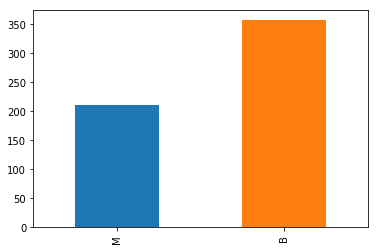

In [10]:
cancer_df['Diagnosis'].value_counts().sort_values().plot.bar()

In [11]:
#changing to categorical to numeric values for cancer type
cancer_df.loc[cancer_df.loc[:, "Diagnosis"] == 'B', "Diagnosis"] = 1
cancer_df.loc[cancer_df.loc[:, "Diagnosis"] == 'M', "Diagnosis"] = 2

### Table -1 

In [12]:
cancer_df.describe()# checking the basic statistics summary for all the features (all features are numeric)

,Diagnosis,RadiusM,TextM,PeriM,AreaM,SmoothM,CompactM,ConcaveM,CPpointM,SymM,...,RadiusW,TextW,PeriW,AreaW,SmoothW,CompactW,ConcaveW,CPpointW,SymW,FracDimW
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,1.371479,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,0.483626,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,1.000000,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,1.000000,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,2.000000,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,2.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Visualization and exploratory data analysis

### Fig:1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E35399DE80>,
      dtype=object)

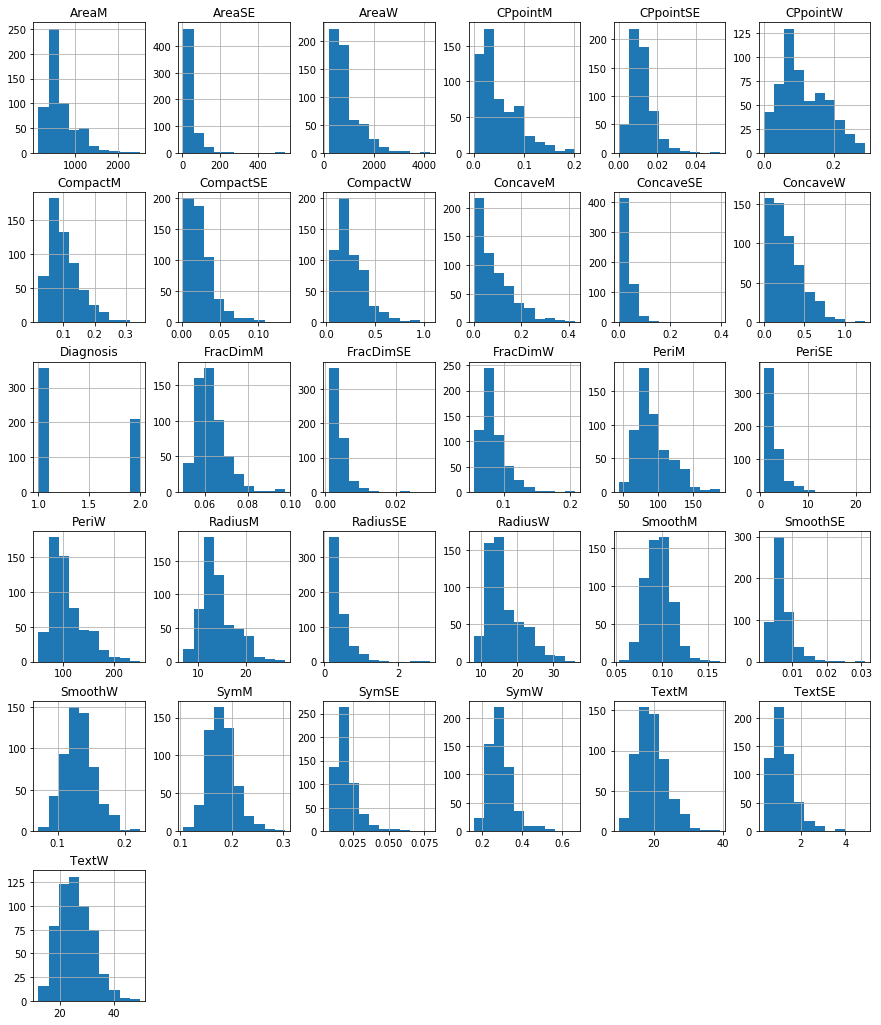

In [13]:
#checking the distribution for all the features by histogram
from matplotlib import rcParams # to change the rc setting 
rcParams['figure.figsize'] = 15, 18
cancer_df.hist()

This data frame has 3-types of values for 10 features - mean values for 10 features, SE value for 10 features, and worst values for 10 featues. How they are calculated is explained in the introduction. Below data is changed into 3 data frame for mean, SE and worst values.

In [14]:
#changing the data frame into three data frames for mean values, SD values and worst values
features_mean = cancer_df.iloc[:, 1:11]
features_SE = cancer_df.iloc[:, 11:21]
features_W = cancer_df.iloc[:, 21:31]
print(features_mean.shape)
print(features_mean.columns)
print(features_SE.shape)
print(features_SE.columns)
print(features_W.shape)
print(features_W.columns)

(568, 10)
Index(['RadiusM', 'TextM', 'PeriM', 'AreaM', 'SmoothM', 'CompactM', 'ConcaveM',
       'CPpointM', 'SymM', 'FracDimM'],
      dtype='object')
(568, 10)
Index(['RadiusSE', 'TextSE', 'PeriSE', 'AreaSE', 'SmoothSE', 'CompactSE',
       'ConcaveSE', 'CPpointSE', 'SymSE', 'FracDimSE'],
      dtype='object')
(568, 10)
Index(['RadiusW', 'TextW', 'PeriW', 'AreaW', 'SmoothW', 'CompactW', 'ConcaveW',
       'CPpointW', 'SymW', 'FracDimW'],
      dtype='object')


Normalization is important to visulize featuers into one plot. Below is the function for z-normalization and three data frame has been normalized seperately.

In [18]:
# normalization of data to visualize features on the same plot
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std
features_mean_scale = scale(features_mean)#scaling for mean features
features_SE_scale = scale(features_SE)#scaling SE features
features_W_scale = scale(features_W)# scaling worst features
y = cancer_df.loc[:, 'Diagnosis']

### Fig:3 a Box plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

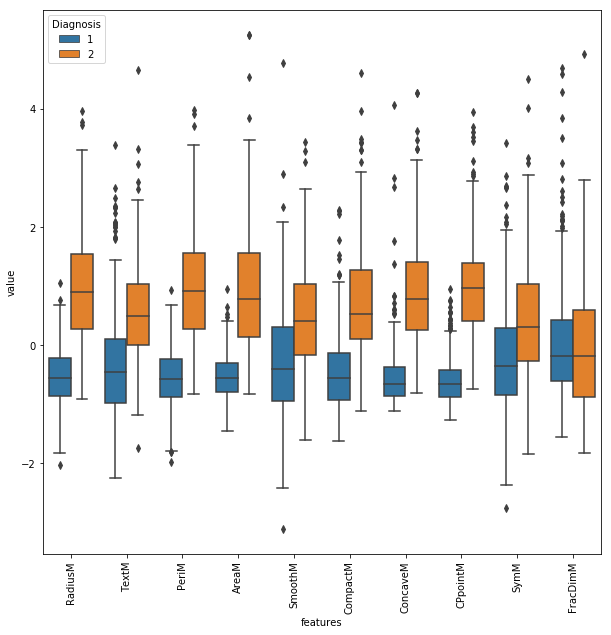

In [19]:
# To see the distribution of data in respect to diagnosis, box plots are plotted for features mean, features SE and features worst.
data = pd.concat([y,features_mean_scale],axis=1)
#melt is for groupby features  with Diagnosis
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Diagnosis", data=data)
plt.xticks(rotation=90)

### Fig: 3b Box plot for features_SE with respect to diagnosis 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

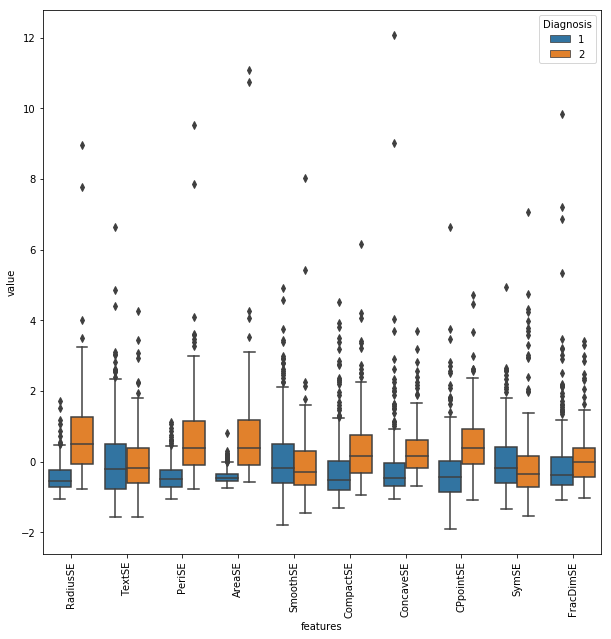

In [20]:
data = pd.concat([y,features_SE_scale],axis=1)
#melt is for groupby features  with Diagnosis
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Diagnosis", data=data)
plt.xticks(rotation=90)

### Fig 3 c Box plot for features_worst with respect to diagnosis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

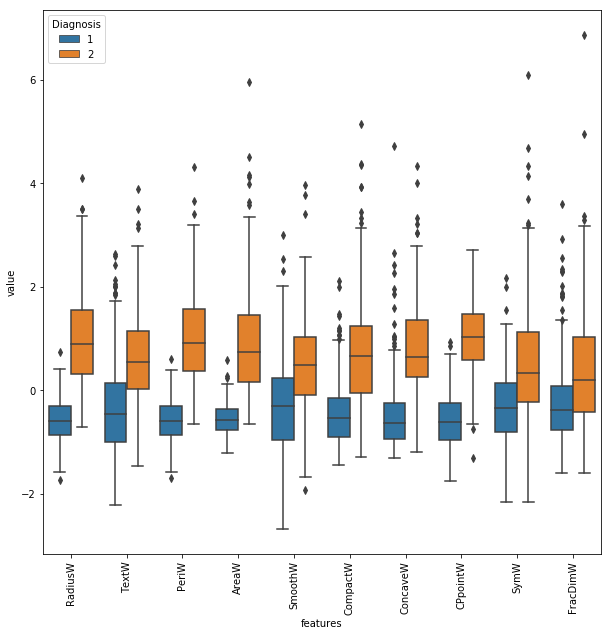

In [21]:
data = pd.concat([y,features_W_scale],axis=1)
#melt is for groupby features  with Diagnosis
data = pd.melt(data,id_vars="Diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Diagnosis", data=data)
plt.xticks(rotation=90)

# Feature selection 

There might be some features those are not contributing to the prediction of the type of cancer and can interfere with the prediction of model. These features may be correlated to each other and we can remove some of these features for the model improvement. Coorelation cofficients are calculated and heat map also created to check correlation between the features

### Table:2 a. correlation cofficients for mean _features

In [22]:
#correlation plots for three data frames seperately to check if there is collinealty between the features
#checking co-relation between the features_mean
Mean_corr = cancer_df[['Diagnosis','RadiusM', 'TextM', 'PeriM' , 'AreaM', 'SmoothM', 'CompactM' , 'ConcaveM', 'CPpointM', 'SymM', 'FracDimM']].corr()
Mean_corr

,Diagnosis,RadiusM,TextM,PeriM,AreaM,SmoothM,CompactM,ConcaveM,CPpointM,SymM,FracDimM
Diagnosis,1.000000,0.729376,0.422146,0.741887,0.708389,0.356276,0.595587,0.695648,0.776369,0.327336,-0.018099
RadiusM,0.729376,1.000000,0.329383,0.997876,0.987344,0.168094,0.505129,0.676557,0.823165,0.144236,-0.317749
TextM,0.422146,0.329383,1.000000,0.335918,0.326193,-0.017769,0.252038,0.315248,0.305590,0.080146,-0.068771
PeriM,0.741887,0.997876,0.335918,1.000000,0.986548,0.204505,0.555676,0.715662,0.851338,0.179100,-0.268103
AreaM,0.708389,0.987344,0.326193,0.986548,1.000000,0.174838,0.497981,0.686232,0.824246,0.148219,-0.288560
SmoothM,0.356276,0.168094,-0.017769,0.204505,0.174838,1.000000,0.657741,0.519002,0.551009,0.555259,0.582435
CompactM,0.595587,0.505129,0.252038,0.555676,0.497981,0.657741,1.000000,0.881619,0.829050,0.598095,0.560161
ConcaveM,0.695648,0.676557,0.315248,0.715662,0.686232,0.519002,0.881619,1.000000,0.920462,0.495525,0.329768
CPpointM,0.776369,0.823165,0.305590,0.851338,0.824246,0.551009,0.829050,0.920462,1.000000,0.457171,0.158464
SymM,0.327336,0.144236,0.080146,0.179100,0.148219,0.555259,0.598095,0.495525,0.457171,1.000000,0.475301


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

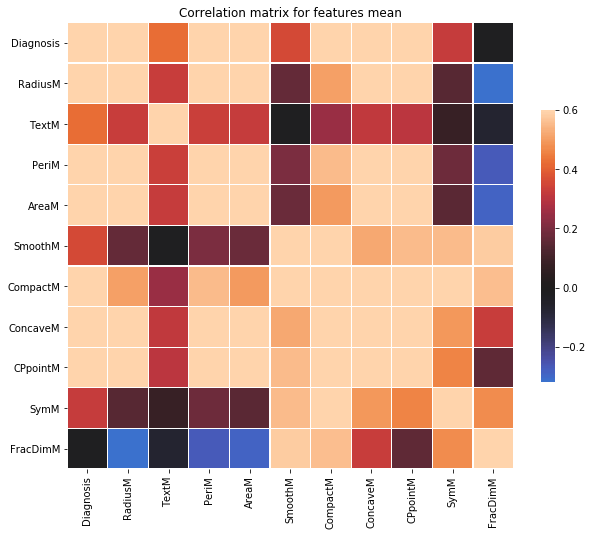

In [23]:
#Further checking relationship by plotting heat map
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(Mean_corr, vmax=.6, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for features mean')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

### Table 2b  Correlation among features_SE

           Diagnosis  RadiusSE    TextSE    PeriSE    AreaSE  SmoothSE  \
Diagnosis   1.000000  0.565373 -0.007024  0.554416  0.546343 -0.066629   
RadiusSE    0.565373  1.000000  0.216973  0.972555  0.951299  0.166369   
TextSE     -0.007024  0.216973  1.000000  0.227668  0.114701  0.397158   
PeriSE      0.554416  0.972555  0.227668  1.000000  0.936973  0.153235   
AreaSE      0.546343  0.951299  0.114701  0.936973  1.000000  0.076509   
SmoothSE   -0.066629  0.166369  0.397158  0.153235  0.076509  1.000000   
CompactSE   0.290866  0.352758  0.233432  0.413312  0.281035  0.337722   
ConcaveSE   0.252567  0.331148  0.195864  0.361600  0.269319  0.269093   
CPpointSE   0.407293  0.513456  0.231095  0.557131  0.415262  0.328818   
SymSE      -0.009170  0.237103  0.413361  0.262925  0.129938  0.414437   
FracDimSE   0.076068  0.225172  0.280908  0.241505  0.123864  0.428043   

           CompactSE  ConcaveSE  CPpointSE     SymSE  FracDimSE  
Diagnosis   0.290866   0.252567   0.407293 -0

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

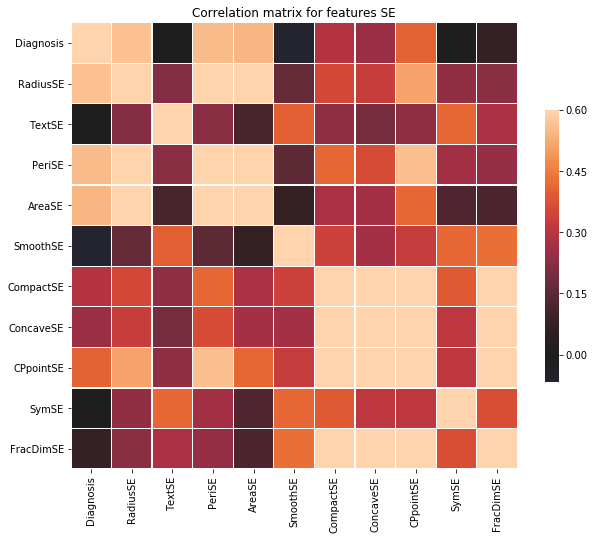

In [24]:
#checking co-relation between the features_SE
SE_corr = cancer_df[['Diagnosis','RadiusSE', 'TextSE', 'PeriSE' , 'AreaSE', 'SmoothSE', 'CompactSE' , 'ConcaveSE', 'CPpointSE', 'SymSE', 'FracDimSE']].corr()
print(SE_corr)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(SE_corr, vmax=.6, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for features SE')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

### Table: 2c Correlation among features _worst

           Diagnosis   RadiusW     TextW     PeriW     AreaW   SmoothW  \
Diagnosis   1.000000  0.775725  0.461443  0.782470  0.732925  0.419731   
RadiusW     0.775725  1.000000  0.366179  0.993814  0.983919  0.213220   
TextW       0.461443  0.366179  1.000000  0.372962  0.352448  0.229277   
PeriW       0.782470  0.993814  0.372962  1.000000  0.977475  0.232911   
AreaW       0.732925  0.983919  0.352448  0.977475  1.000000  0.205573   
SmoothW     0.419731  0.213220  0.229277  0.232911  0.205573  1.000000   
CompactW    0.589453  0.471449  0.369929  0.524406  0.433217  0.566435   
ConcaveW    0.658348  0.570994  0.375497  0.615071  0.539917  0.516469   
CPpointW    0.793181  0.785908  0.367555  0.814596  0.745417  0.545762   
SymW        0.413382  0.236712  0.241615  0.261299  0.201508  0.491526   
FracDimW    0.320983  0.087622  0.224867  0.132155  0.073323  0.616128   

           CompactW  ConcaveW  CPpointW      SymW  FracDimW  
Diagnosis  0.589453  0.658348  0.793181  0.413382

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

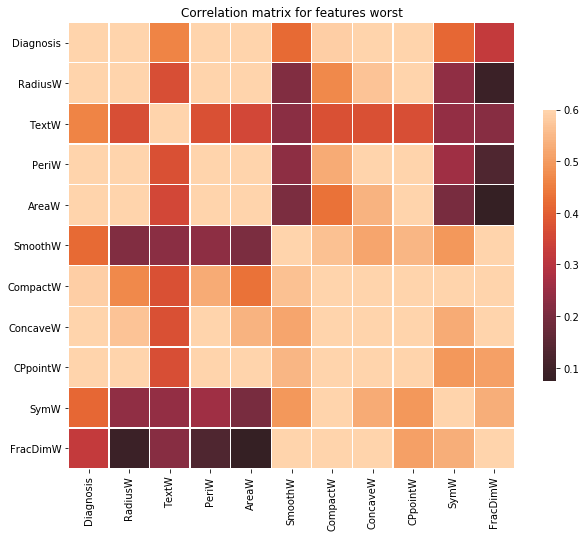

In [25]:
#checking co-relation between the features_worst
Worst_corr = cancer_df[['Diagnosis','RadiusW', 'TextW', 'PeriW' , 'AreaW', 'SmoothW', 'CompactW' , 'ConcaveW', 'CPpointW', 'SymW', 'FracDimW']].corr()
print(Worst_corr)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(Worst_corr, vmax=.6, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for features worst')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

According to correlation cofficient, Area, Perimeter and Radius were highly correlated with each other for mean, SE and worst features. By checking distribution plots for these features, PeriM, Peri SE and RadiusW were selected for the regression model. FracDimSE, SymSE, SmoothSE, TextSE, FracDimM, are showing no relation wiht diagnosis. Total 19 features were selected out of 30 features. Highly correlated features has been dropped.

# Linear Regression model

In [26]:
#Building a linear regression model to predict cancer type with all the selected features
# dropping all the columns those are corelated to other features and not related with target label
target_label = 'Diagnosis'
drop_list = ['RadiusM', 'AreaM', 'AreaSE', 'RadiusSE', 'TextSE', 'FracDimSE','SymSE','SmoothSE', 'FracDimM','PeriW', 'AreaW']
cancer_df_selected = cancer_df.drop(drop_list,axis = 1 )# new cancer dataframe with 19 selected features        

In [27]:
print(cancer_df_selected.columns)
print(target_label)

Index(['Diagnosis', 'TextM', 'PeriM', 'SmoothM', 'CompactM', 'ConcaveM',
       'CPpointM', 'SymM', 'PeriSE', 'CompactSE', 'ConcaveSE', 'CPpointSE',
       'RadiusW', 'TextW', 'SmoothW', 'CompactW', 'ConcaveW', 'CPpointW',
       'SymW', 'FracDimW'],
      dtype='object')
Diagnosis


In [28]:
X = cancer_df_selected.drop('Diagnosis', axis =1)
y = cancer_df_selected['Diagnosis']

In [29]:
#scaling new features
X_scale = scale(X)

In [41]:
import statsmodels.formula.api as sm
ols_model = sm.ols(formula = 'y ~ TextM + PeriM + SmoothM + CompactM + ConcaveM + CPpointM + SymM + PeriSE + CompactSE + ConcaveSE + CPpointSE + RadiusW + TextW + SmoothW + CompactW + ConcaveW + CPpointW + SymW + FracDimW', data=X_scale)
results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

mean_y = np.mean(y)
sst = np.sum((y - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics:
print(results.summary())


Intercept, Slope : Intercept    1.371479
TextM        0.044743
PeriM        0.003527
SmoothM     -0.009032
CompactM    -0.165502
ConcaveM     0.065062
CPpointM     0.134143
SymM        -0.003603
PeriSE       0.010968
CompactSE    0.003941
ConcaveSE   -0.125599
CPpointSE    0.108342
RadiusW      0.174215
TextW        0.026351
SmoothW      0.052630
CompactW    -0.001404
ConcaveW     0.107159
CPpointW    -0.011883
SymW         0.064227
FracDimW     0.051012
dtype: float64
SSE: 98.85560152296739
SST: 132.61795774647885
SSR: 33.76235622351146
RMSE: 2.2809924147058562
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     84.45
Date:                Thu, 15 Nov 2018   Prob (F-statistic):          6.68e-149
Time:                        23:44:2

RMSE is low but the value of R sqare is not very high. There are few features those are showing significant difference. p value of those feature is low and confidence- interval doesn't contain 0 value.

To further improve the regression model, tried to reduce the dimention by doing principal component analysis.

# Regularization of model by principal component analysis

In [34]:
pca = PCA()
pca_result = pca.fit_transform(X_scale)
column_names = ['pc' + str(iX+1) for iX in range(X_scale.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y

In [35]:
print(pca.explained_variance_)

[9.77996347e+00 2.56917843e+00 1.83986112e+00 1.57249648e+00
 8.75063227e-01 8.30423806e-01 4.10049071e-01 2.63118146e-01
 2.44399612e-01 1.61578162e-01 1.20721604e-01 1.08918945e-01
 7.88954073e-02 6.17943746e-02 4.61918933e-02 2.76548417e-02
 1.92503488e-02 1.57560140e-02 8.19474921e-03]


Text(0,0.5,'Explained Variance')

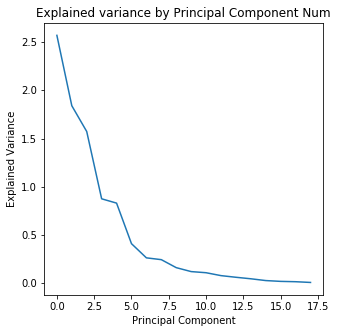

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(pca.explained_variance_[1:])
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

# Principal component Regression

In [40]:
pcr_new = sm.ols(formula = 'y ~ pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7', data=pca_df)
results_new = pcr_new.fit()
n_points = pca_df.shape[0]
y_output = pca_df['Diagnosis'].values.reshape(n_points, 1)

# Get most of the linear regression statistics:
print(results_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     206.6
Date:                Thu, 15 Nov 2018   Prob (F-statistic):          1.19e-150
Time:                        23:34:38   Log-Likelihood:                -30.435
No. Observations:                 568   AIC:                             76.87
Df Residuals:                     560   BIC:                             111.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3715      0.011    127.130      0.0

There are three principal components (pc1, pc2, and pc3) those are showing significant differnce. p value is very low and confidence intervel doesn't contain 0. Pricipal component regression was performed agin with these three components.

In [ ]:
n = 3
formula_start =  target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
fig, ax = plt.subplots(figsize=(6, 6))
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

R sequare value didn't increase but it is similar with the linear regression R square values. Residual histogram also showing normal behaviour.

# Results and conclusions:
-	There are 357 values for the benign cancer category and 211 values for the malignant category.
-	From the table 1 statistics summary, it can be seen that all the features have different inter-quantile range and mean of all the features is very different, therefore scaling is very important before doing any data analysis.
-	Distribution of data is visualized by the histogram (Fig: 1) and it can be seen that some features are more close to normal distribution such as SmoothW. 
-	There are some features such as Text M where benign and malignant categories are separated clearly and FracDimM, categories are not separated clearly (Fig: 3 a). Median of RadiusM, PeriM and AreaM are very similar and may show collinearity. 
-	Further, box plots are showing outliners in the features.
-	For the feature selection, correlation coefficients were calculated and heat maps were also generated. According to correlation coefficients and distribution of data, 19 features were selected which can be potential features for the good model predictions. (Table : 5a, b, c)
-	A linear regression model was generated with selected 19 features. R square value  was 0.747 and adjusted R square value is 0.738. RMSE value was low (2.28) and  intercept was 1.3714 , p value was also low but F-statistic was not very high (85.06). This model is not very efficient and can not work well with testing data set or other data set. In order to improve the model, principal component were identified to reduce the dimensions. As shown in experience_ variance plot , there are 8 components those are contributing high variance but pc1, pc2 and pc3 are showing high variance and significant p value and their confidence interval doesn’t contain 0 value. Therefore, a PCR was performed with these three principal components. However, R square value and adjusted R Square values did not improve but the number of dimension has reduced from 20 to 3. 